# Homework 1: Data Preparation and Feature Engineering

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem 
from rdkit.Chem import AllChem
import mordred
from mordred import Calculator, descriptors

**Question 1:** implement the following function.<br>
*Input*: a list of mordred features.<br>
*Output*: a mordred calculator

In [134]:
def register(features):
    return Calculator(features)

The following example should work, but it won't do anything interesting.

In [135]:
register([mordred.AtomCount.AtomCount('C')])

**Question 2:** implement the following function.<br>
*Input*: A SMILES string<br>
*Output*: An RdKit molecule 

In [136]:
def smiles_to_mol(smiles):
    return Chem.MolFromSmiles(smiles)

The following example should work and plot CH4

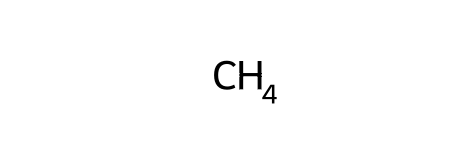

In [137]:
smiles_to_mol('C')

**Question 3:** implement the following function.<br>
*Input*: pandas dataframe, list of features, a smiles_to_mol function <br>
*Output* a new pandas dataframe with features: 

In [138]:
def featurize(df,features,smiles_to_mol):
    data = df['SMILES'].apply(smiles_to_mol)
    #return register(features).pandas(data)
    return pd.merge(register(features).pandas(data), df['Solubility'], left_index=True, right_index=True)

The following example should work and display part of a table with some features. First, let's load some data.

In [139]:
test_data = pd.read_csv('../../Data/Solubility/dataset-E.csv')

In [140]:
test_features = featurize(test_data,[mordred.AtomCount.AtomCount('C')],smiles_to_mol)

100%|██████████| 1291/1291 [00:02<00:00, 482.82it/s]


In [141]:
test_features

,nC,Solubility
0,5,-3.18
1,5,-2.64
2,6,-3.84
3,6,-3.74
4,6,-3.55
...,...,...
1286,10,-3.37
1287,9,-5.49
1288,20,-2.47
1289,14,-7.15


**Question 4:** implement the following function.<br>
*Input*: pandas dataframe, number of features to display <br>
*Output:* list of n most correlated features, list of n most anticorrelated features: 

In [142]:
def correlates(fdf, n):
    corr = fdf.corrwith(fdf['Solubility'])
    return corr.sort_values(ascending=False).head(n), corr.head(n)

The following example should work and return two lists of features with their correlation to Solubility.

In [143]:
correlates(test_features,3)

(Solubility    1.000000
 nC           -0.591717
 dtype: float64,
 nC           -0.591717
 Solubility    1.000000
 dtype: float64)

**Question 5:** implement the following function.<br>
*Input*: pandas dataframe, single feature<br>
*Output*: none, the function should plot the solubility as a function of the value of the feature

In [144]:
def plot_feature(fdf,feature):
    plt.scatter(fdf[feature], fdf['Solubility'])
    pass

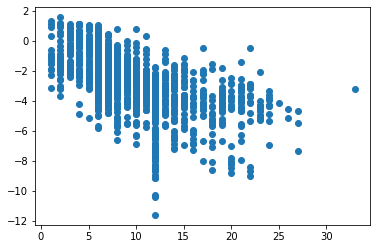

In [145]:
plot_feature(test_features,'nC')

**Question 6:** implement the following function.<br>
*Input*: path to dataset, list of features, smiles_to_mol function<br>
*Output*: none, the function should dump two csv files, one for the features, one for the solubility

In [146]:
def prepare_dataset(dataset,features,smiles_to_mol):
    data_features = featurize(pd.read_csv(dataset),features,smiles_to_mol)
    data_features['nC'].to_csv("features.csv")
    data_features['Solubility'].to_csv("solubility.csv")
    pass

The following example should work and create two new files on your directory.

In [147]:
prepare_dataset('../../Data/Solubility/dataset-E.csv',[mordred.AtomCount.AtomCount('C')],smiles_to_mol)

100%|██████████| 1291/1291 [00:02<00:00, 486.86it/s]


## Towards the milestone project

The functions you have implemented will play a key role for the milestone project. First, you should use them to explore the data and select good features. Note that the following command will let you play with all of the available features, ignoring the 3D ones. 

In [148]:
Calculator(descriptors, ignore_3D=True)

Second, once you have selected your features, you will run the prepare_dataset function to create the data that you will use for the upcoming homeworks. 